<a>
<img src="https://mma.prnewswire.com/media/900043/Great_Learning_Logo.jpg?p=publish" alt="Great Learning Logo" style="float:right;width:250px;height:50px;">

<H1>Automatic Ticket Assignment</H1></a>

### Team  
  *   Balaji.S
  *   Jeeson Santhosh Colaco
  *   Sahil Pattnayak
  *   Sarvesh Chandra

The goal is to build a classifier that can classify the tickets by analysing text.

Details about the data and dataset files are given in below link,
https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

Milestone 1: Pre-Processing, Data Visualisation and EDA

    Overview

        ● Exploring the given Data files
        ● Understanding the structure of data
        ● Missing points in data
        ● Finding inconsistencies in the data
        ● Visualizing different patterns
        ● Visualizing different text features
        ● Dealing with missing values
        ● Text preprocessing
        ● Creating word vocabulary from the corpus of report text data
        ● Creating tokens as required

Milestone 2: Model Building

    Overview

        ● Building a model architecture which can classify.
        ● Trying different model architectures by researching state of the art for similar tasks.
        ● Train the model
        ● To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

Milestone 3: Test the Model, Fine-tuning and Repeat

    Overview

        ● Test the model and report as per evaluation metrics
        ● Try different models
        ● Try different evaluation metrics
        ● Set different hyper parameters, by trying different optimizers, loss functions, epochs,
        learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
        ● Report evaluation metrics for these models along with your observation on how
        changing different hyper parameters leads to change in the final evaluation metric.


The objective of the project are,

    ● Learn how to use different classification models.
    ● Use transfer learning to use pre-built models.
    ● Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.

## Problem
Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.</br>

## Business Value Proposition
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.</br>

## Abstract
An attempt at Leveraging Machine Learning and Artifical intelligence to automatically classify tickets and assign them to the right owner in a timely manner to save effort, increase user satifaction and improve throughput in the ticketing pipeline of an organization.


## Objective:
  * To undertake a multi-faceted project that demonstrates your understanding and mastery of the key conceptual and technological aspects of Deep Learning.  
  * To develop an understanding of how challenging human-level problems can be approached and solved using a combination of tools and techniques.  
  * To understand current scenarios in deep learning, understand the practicalities and the trade-offs that need to be made when solving a problem in real life.

## 1. Problem interpretation:
  * Understand the data  
  * Make an abstract or an overview based on your approach  
  * Break the problem into smaller tasks  
  * Discuss among your teammates and share responsibilities</br>  

## 2. Data analysis and preprocessing: 
  * Visual displays are powerful when used well, so think carefully about the information the display.  
  * Include any insightful visualization  
  * Share and explain particularly meaningful features, interactions or summary of data  
  * Display examples to input in your model  
  * Explain changes to be incorporated into data so that it becomes ready for the model</br>  

## 3. Modeling:
  * What kind of neural network you have used and why?  
  * What progress you have made towards your intended solution?</br>  

Importing Standard Libraries

In [ ]:
import warnings, os
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import string

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

Importing Standard NLP Libraries

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from ftfy import fix_text
import googletrans

# wordcloud visualisation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Importing Traditional Machine Learning Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# performance metrics
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

Importing Sequential Libraries

In [ ]:
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM,  Bidirectional
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

Load the dataset

In [ ]:
df = pd.read_excel('Input Data.xlsx')
print('Printing the first 5 rows of the dataset')
df.head()

Printing the first 5 rows of the dataset


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
print('Printing the last 5 rows of the dataset')
df.tail()

Printing the last 5 rows of the dataset


,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


In [ ]:
print('The dataset contains\033[1m {}\033[0m rows and\033[1m {}\033[0m columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 8500 rows and 4 columns.


#### Defining some common functions which are needed for our analysis

In [ ]:
# WordCloud function from wordcloud library.
def ShowWordCloud(collection):
    wc = WordCloud(width = 3000,height = 2000, background_color = 'black',  stopwords = STOPWORDS)
    
    wc_word = wc.generate(str(collection))
    
    plt.figure(figsize=(20, 15), facecolor = 'k')
    plt.imshow(wc_word)
    return wc

### Data Analysis on Shot Description Column

In [ ]:
df['Short description'].isnull().sum()

8

In [ ]:
df['Short description'].describe().T

count               8492
unique              7481
top       password reset
freq                  38
Name: Short description, dtype: object

Most frequent words in Short description dataset before text pre-processing


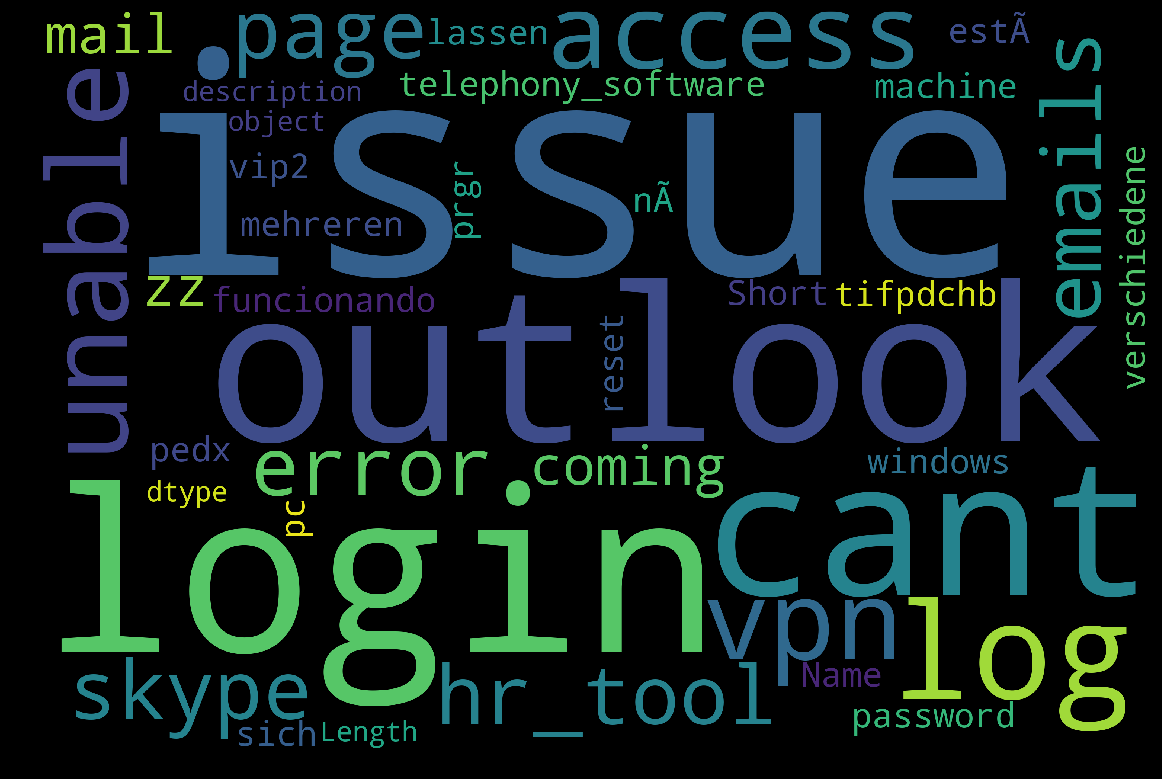

In [ ]:
print('\033[1mMost frequent words in Short description dataset before text pre-processing\033[0m')
ShowWordCloud(df['Short description'])

##### From Observation from analysing the Short Description column
* There are 8 null values
* The top most issue the is repeated in the column is "password reset" with 38 occurances
* There are 7482 unique words
* From the WordCloud ,the top most text are "issue", "outlook", "cant" , "login" etc

### Data Analysis on  Description Column

In [ ]:
df['Description'].isnull().sum()

1

In [ ]:
df['Description'].describe().T

count     8499
unique    7817
top        the
freq        56
Name: Description, dtype: object

Most frequent words in Description dataset before text pre-processing


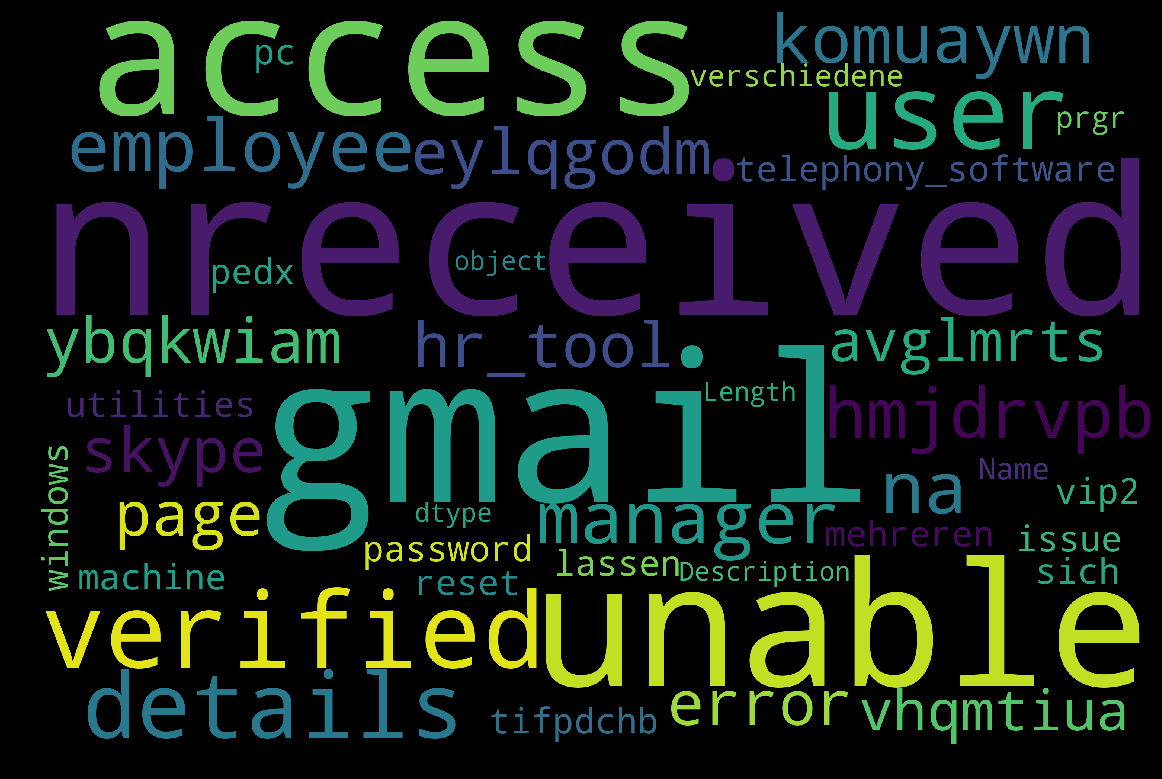

In [ ]:
print('\033[1mMost frequent words in Description dataset before text pre-processing\033[0m')
ShowWordCloud(df['Description'])

##### From Observation from analysing the Description column
* There is 1 row with  null value
* The top most issue the is repeated in the column is "the" with 57 occurances
* There are 7817 unique words
* From the WordCloud ,the top most text are "received", "gmail", "unable" , "access" etc

### Data Analysis of Caller Column

In [ ]:
df['Caller'].isnull().sum()

0

In [ ]:
df['Caller'].describe().T

count                  8500
unique                 2950
top       bpctwhsn kzqsbmtp
freq                    810
Name: Caller, dtype: object

Most frequent words in Caller column


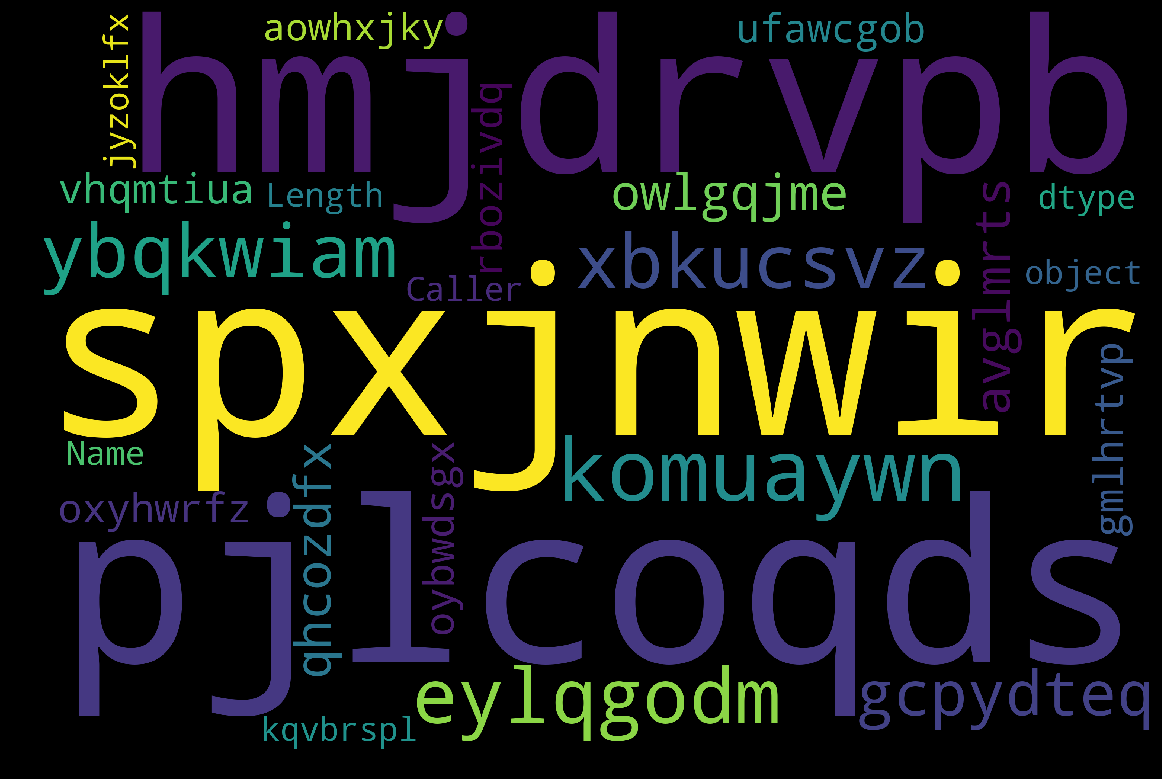

In [ ]:
print('\033[1mMost frequent words in Caller column\033[0m')
ShowWordCloud(df['Caller'])

##### Observation from analysis of the Caller column
* There are no rows with  null value
* "bpctwhsn kzqsbmtp" with 810 calls has raised the maximum number of tickets
* There are 2950 unique words

### Data Analysis of Assignment Group

In [ ]:
df['Assignment group'].isnull().sum()

0

In [ ]:
df['Assignment group'].describe().T

count      8500
unique       74
top       GRP_0
freq       3976
Name: Assignment group, dtype: object

In [ ]:
group_frequency = dict(df['Assignment group'].value_counts())
group_df = pd.DataFrame.from_dict(group_frequency, orient = 'index', columns = ['frequency'])
group_df.head(10)

,frequency
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
GRP_2,241
GRP_19,215
GRP_3,200
GRP_6,184
GRP_13,145


In [ ]:
group_df.tail(10)

,frequency
GRP_54,2
GRP_71,2
GRP_72,2
GRP_69,2
GRP_73,1
GRP_67,1
GRP_61,1
GRP_70,1
GRP_35,1
GRP_64,1


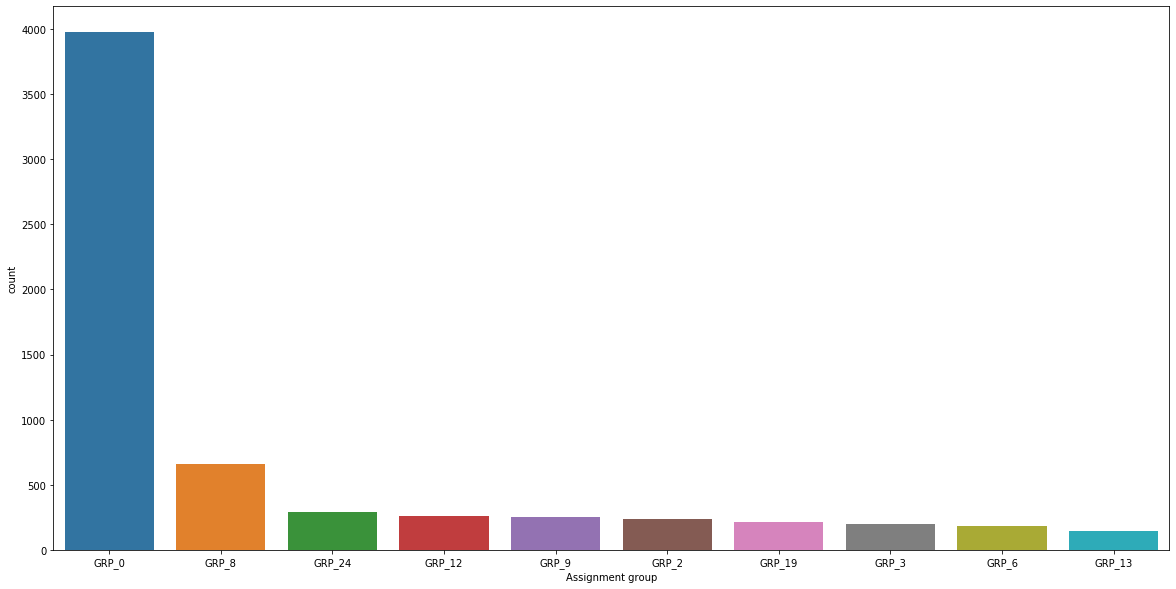

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(df['Assignment group'], label = "Count", order = df['Assignment group'].value_counts().iloc[:10].index)

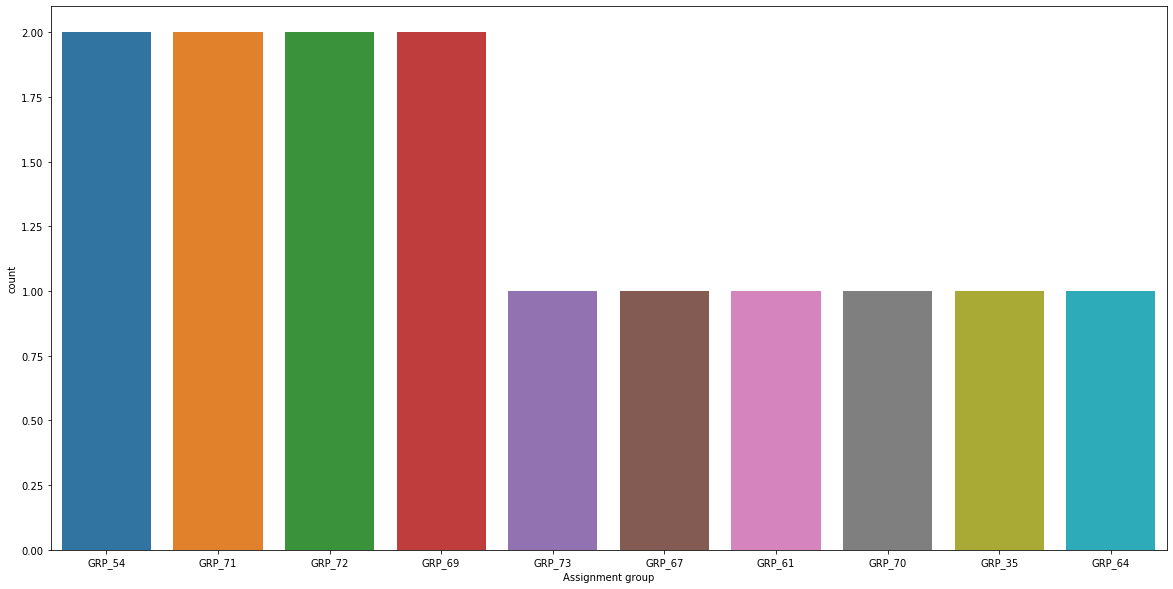

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(df['Assignment group'],label="Count",order=df['Assignment group'].value_counts().iloc[64:].index)

In [ ]:
group_df['% representation'] = round(((group_df['frequency'] / group_df['frequency'].sum()) * 100), 2)
group_df.head(10)

,frequency,% representation
GRP_0,3976,46.78
GRP_8,661,7.78
GRP_24,289,3.40
GRP_12,257,3.02
GRP_9,252,2.96
GRP_2,241,2.84
GRP_19,215,2.53
GRP_3,200,2.35
GRP_6,184,2.16
GRP_13,145,1.71


##### Observations from analysis of the Assignment Group column

* There are no null values
* We see that there are total 74 assignments groups in the data
* Top 1 group worked on 46% of the tickets
* Top 1-Top 3 worked on 57% of the tickets
* Top 1-Top 5 worked on 64% of the tickets
* Top 1-Top 10 worked on 75% of the tickets
* Bottom 10 groups contain 1 or 2 cases asssigned to them

In [ ]:
#### Since there are 8 rows with null values in the column "Short description" and 1 row in "Description" column 
#### Lets replace the nulls rows with the respective columns max occurances rows
df['Short description'].fillna(str('password reset'), inplace = True)
df['Description'].fillna(str('the'), inplace = True)
print('Replacing the NULL values with "the" string and verifying the output.')
df.isnull().sum()

Replacing the NULL values with "the" string and verifying the output.


Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

### On further digging in into the data we found that the data contains some encoded text too, also known as Garbled Text.

In [ ]:
df.iloc[8455:8475, :]

,Short description,Description,Caller,Assignment group
8455,need teamviewer full version and visio applica...,need teamviewer full version and visio applica...,welztypu yseckbvf,GRP_19
8456,calculation of the claim amount will make a mi...,from: uxndyfrs vahxnfgl [mailto:uxndyfrs.vahxn...,uxndyfrs vahxnfgl,GRP_13
8457,æ— æ³•ç™»é™†hr_toolè€ƒå‹¤ç³»ç»Ÿ,æ˜¾ç¤ºjavaæ’ä»¶æ— æ³•åŠ è½½ï¼Œæ‰€éœ€ç‰ˆæœ¬1.8...,kyagjxdh dmtjpbnz,GRP_30
8458,windows account locked,windows account locked,nfckwprm iykptjna,GRP_0
8459,erp crm complaint when is assigned generating ...,when we update the complaint with assigned sta...,aoyrspjv hctgfeal,GRP_15
8460,abended job in job_scheduler: Job_1148,received from: monitoring_tool@company.com\r\n...,ZkBogxib QsEJzdZO,GRP_9
8461,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,uvrbhlnt bjrmalzi,GRP_8
8462,abended job in job_scheduler: Job_1141,received from: monitoring_tool@company.com\r\n...,ZkBogxib QsEJzdZO,GRP_9
8463,kindly refer mail-renew account for visfgthal-...,"hello snhdfihytu,\nkindly refer mail-renew acc...",rmdtqfxa fwpnqdxo,GRP_2
8464,SID_1 log in issue,\r\n\r\nreceived from: rjanhbde.owfkyjcp@gmail...,rjanhbde owfkyjcp,GRP_0


Here, rows having index as 8457, 8465 & 8471 show the garbled text. Here, we use the library "ftfy" to decode the text as an example.

In [ ]:
print('\033[1mOriginal Garbled Text:\033[0m ', df['Short description'][8457])
print('\033[1mText after conversion:\033[0m ', fix_text(df['Short description'][8457]))

Original Garbled Text:  无法登陆hr_tool考勤系统
Text after conversion:  无法登陆hr_tool考勤系统


In [ ]:
print('\033[1mOriginal Garbled Text:\033[0m ', df['Description'][8457])
print('\033[1mText after conversion:\033[0m ', fix_text(df['Description'][8457]))

Original Garbled Text:  显示java插件无法加载,所需版本1.8.0.-45或更高版本。
Text after conversion:  显示java插件无法加载,所需版本1.8.0.-45或更高版本。


In [ ]:
print('\033[1mOriginal Garbled Text:\033[0m ', df['Short description'][8465])
print('\033[1mText after conversion:\033[0m ', fix_text(df['Short description'][8465]))

Original Garbled Text:  vpn 连接不上
Text after conversion:  vpn 连接不上


In [ ]:
print('\033[1mOriginal Garbled Text:\033[0m ', df['Description'][8465])
print('\033[1mText after conversion:\033[0m ', fix_text(df['Description'][8465]))

Original Garbled Text:  vpn连不上,请转给 贺正平 atcbvglq.bdvmuszt@gmail.com
Text after conversion:  vpn连不上,请转给 贺正平 atcbvglq.bdvmuszt@gmail.com


In [ ]:
print('\033[1mOriginal Garbled Text:\033[0m ', df['Short description'][8471])
print('\033[1mText after conversion:\033[0m ', fix_text(df['Short description'][8471]))

Original Garbled Text:  电脑开机开不出来
Text after conversion:  电脑开机开不出来


In [ ]:
print('\033[1mOriginal Garbled Text:\033[0m ', df['Description'][8471])
print('\033[1mText after conversion:\033[0m ', fix_text(df['Description'][8471]))

Original Garbled Text:  to 小贺,早上电脑开机开不出来
Text after conversion:  to 小贺,早上电脑开机开不出来


Now we will apply the function, 'fix_text' to the entire Short description and Description columns.

In [ ]:
df['Short description'] = df['Short description'].apply(fix_text)
df['Description'] = df['Description'].apply(fix_text)

In [ ]:
df.iloc[8455:8475, :]

,Short description,Description,Caller,Assignment group
8455,need teamviewer full version and visio applica...,need teamviewer full version and visio applica...,welztypu yseckbvf,GRP_19
8456,calculation of the claim amount will make a mi...,from: uxndyfrs vahxnfgl [mailto:uxndyfrs.vahxn...,uxndyfrs vahxnfgl,GRP_13
8457,无法登陆hr_tool考勤系统,"显示java插件无法加载,所需版本1.8.0.-45或更高版本。",kyagjxdh dmtjpbnz,GRP_30
8458,windows account locked,windows account locked,nfckwprm iykptjna,GRP_0
8459,erp crm complaint when is assigned generating ...,when we update the complaint with assigned sta...,aoyrspjv hctgfeal,GRP_15
8460,abended job in job_scheduler: Job_1148,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,GRP_9
8461,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,uvrbhlnt bjrmalzi,GRP_8
8462,abended job in job_scheduler: Job_1141,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,GRP_9
8463,kindly refer mail-renew account for visfgthal-...,"hello snhdfihytu,\nkindly refer mail-renew acc...",rmdtqfxa fwpnqdxo,GRP_2
8464,SID_1 log in issue,\n\nreceived from: rjanhbde.owfkyjcp@gmail.com...,rjanhbde owfkyjcp,GRP_0


It can be seen that the text has been converted to its respective language.

In [ ]:
translator = googletrans.Translator()

In [ ]:
# We will try to detect the langauge and further translate the language to English
df['Description'][8457]

'显示java插件无法加载,所需版本1.8.0.-45或更高版本。'

In [ ]:
langs = translator.detect(['显示java插件无法加载,所需版本1.8.0.-45或更高版本。'])
for lang in langs:
    print('\033[1mDetected Language\033[0m:- \033[1mChinese {}\033[0m with \033[1m{}\033[0m% confidence.'.format(lang.lang, ((lang.confidence) * 100)))

In [ ]:
translations = translator.translate(['显示java插件无法加载,所需版本1.8.0.-45或更高版本。'], dest = 'en')
for translation in translations:
    print('\033[1mOriginal Text:\033[0m ', translation.origin)
    print('\033[1mTranslated Text:\033[0m ', translation.text)

In [ ]:
langs = translator.detect(['电脑开机开不出来'])
for lang in langs:
    print('\033[1mDetected Language\033[0m:- \033[1mChinese {}\033[0m with \033[1m{}\033[0m% confidence.'.format(lang.lang, ((lang.confidence) * 100)))

In [ ]:
translations = translator.translate(['电脑开机开不出来'], dest = 'en')
for translation in translations:
    print('\033[1mOriginal Text:\033[0m ', translation.origin)
    print('\033[1mTranslated Text:\033[0m ', translation.text)

In [ ]:
langs = translator.detect(['machine não está funcionando'])
for lang in langs:
    print('\033[1mDetected Language\033[0m:- \033[1mPortuguese {}\033[0m with \033[1m{}\033[0m% confidence.'.format(lang.lang, ((lang.confidence) * 100)))

In [ ]:
translations = translator.translate(['machine não está funcionando'], dest = 'en')
for translation in translations:
    print('\033[1mOriginal Text:\033[0m ', translation.origin)
    print('\033[1mTranslated Text:\033[0m ', translation.text)

In [ ]:
langs = translator.detect(['an mehreren pc`s lassen sich verschiedene prgramdntyme nicht öffnen. bereich cnc.'])
for lang in langs:
    print('\033[1mDetected Language\033[0m:- \033[1mGerman {}\033[0m with \033[1m{}\033[0m% confidence.'.format(lang.lang, ((lang.confidence) * 100)))

Here the detected langauge is "'de': 'german'" and with 100% confidence.

In [ ]:
translations = translator.translate(['an mehreren pc`s lassen sich verschiedene prgramdntyme nicht öffnen. bereich cnc.'], dest = 'en')
for translation in translations:
    print('Original Text: ', translation.origin)
    print('Translated Text: ', translation.text)

### Text Preprocessing
Text preprocessing is the process of transferring text from human language to machine-readable format for further processing. After a text is obtained, we start with text normalization. Text normalization includes:
- converting all letters to lower or upper case
- removing punctuations, accent marks and other diacritics
- converting numbers into words or removing numbers
- removing white spaces
- removing stop words, sparse terms, and particular words
- text canonicalization

Converting all letters to lowercase characters

In [ ]:
df['Description'] = df['Description'].apply(lambda x: x.lower())
df['Short description'] = df['Short description'].apply(lambda x: x.lower())
df['Caller'] = df['Caller'].apply(lambda x: x.lower())

Removing punctuations, accent marks and other diacritics

In [ ]:
import re
def remove_punct(text):
    text = re.sub('[0-9]+|\n|\r|[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text)
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    return text

In [ ]:
df['Description_new'] = df['Description'].apply(lambda x: remove_punct(x))
df['Short description_new'] = df['Short description'].apply(lambda x: remove_punct(x))

In [ ]:
print('\033[1mOriginal text:\033[0m')
print(df['Description'][32])

print('\033[1mCleaned text:\033[0m')
print(df['Description_new'][32])

Original text:


received from: kxsceyzo.naokumlb@gmail.com

gentles,

i have two devices that are trying to share an ip address. they are trying to share 96.26.27.9619. one is a printer with the hostname of prtjc0074, and the other is a new display for erp. the display is using dhcp to get its address assigned and the printer is hard coded.

my guess is that the address 96.26.27.9619 did not get set to a static address in dhcp. i need this corrected so the display will pick up another address.


Cleaned text:
 received from kxsceyzo naokumlb gmail com gentles i have two devices that are trying to share an ip address they are trying to share one is a printer with the hostname of prtjc and the other is a new display for erp the display is using dhcp to get its address assigned and the printer is hard coded my guess is that the address did not get set to a static address in dhcp i need this corrected so the display will pick up another address 


### **Comments:**
- Entire dataset is converted into lower case.
- Users email addresses will add NO value to our analysis, inspite of the fact that user id is given in the caller column. So all email adresses are removed from the dataset.
- All numericals have been removed because they were dominating the dataset if we were converting them into their word representation otherwise.
- All punctuation marks have been removed which posed to be a hindrance for lemmatization.
- All occurances of more than one blank spaces, horizontal tab spaces, new line breaks etc., have been replaced with single blank space.

### Stemming  
Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix. There are several stemming models, including Porter and Snowball. The results can be used to identify relationships and commonalities across large datasets.

### Lemmatization  
Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.  
Lemmazation is an alternative approach from stemming to removing inflection. By determining the part of speech and utilizing WordNet’s lexical database of English, lemmazation can get better results.

### Tokenization  
Tokenization describes splitting paragraphs into sentences, or sentences into individual words.  
This relies on a pre-trained, language specific algorithms like the Punkt Models from NLTK.

In [ ]:
nltk.download('punkt')
snow = SnowballStemmer('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [ ]:
dn = df['Description_new'].head(10)

In [ ]:
tokenizedword_dn = word_tokenize(str(dn))
top10 = tokenizedword_dn[:20]
top10

['0',
 'verified',
 'user',
 'details',
 'employee',
 'manager',
 'name',
 'c',
 '...',
 '1',
 'received',
 'from',
 'hmjdrvpb',
 'komuaywn',
 'gmail',
 'com',
 'hel',
 '...',
 '2',
 'received']

Most frequent words in Description dataset after text pre-processing


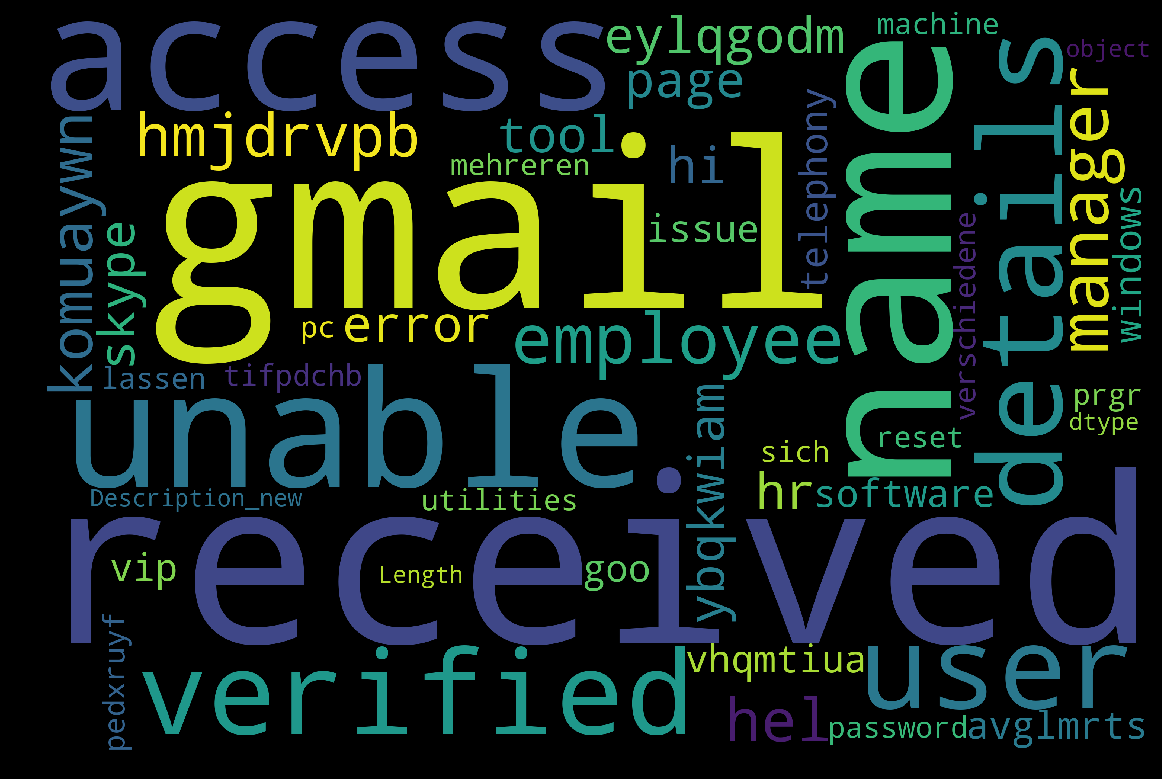

In [ ]:
print('\033[1mMost frequent words in Description dataset after text pre-processing\033[0m')
ShowWordCloud(df['Description_new'])

### Stopwords  
A majority of the words in a given text are connecting parts of a sentence rather than showing subjects, objects or intent. Word like “the” or “and” cab be removed by comparing text to a list of stopword.  
Removing Stopwords by using NLTK library after setting the language as English

In [ ]:
#setting english as language for the stopwords
stop_words = set(stopwords.words('english'))
print('\033[1mStopwords:\n\033[0m', stop_words)

Stopwords:
 {'were', 'below', 'from', 'its', 'did', 'you', 'any', 'whom', 'than', 'such', 'during', "you'd", 'more', 'no', 'other', 'too', 'then', 'some', 'be', 'itself', 'y', 'now', 'weren', 'wouldn', 'before', 'those', 'into', 'yourselves', 'it', 'has', 'mightn', "mightn't", "weren't", 'an', 'can', 'll', 'the', 'we', 'them', 'or', 'ours', 're', 'isn', 'herself', 'through', 'doesn', 'few', 'doing', 'at', 'where', 've', 'under', "hasn't", 'against', 'same', 'was', 'what', 'o', 'a', 'with', 'yours', "it's", 'he', 'my', 'your', 'theirs', 'above', 'because', 'ma', 'up', 'which', "you're", 'wasn', 'of', 'this', 'aren', 'hadn', "didn't", "should've", "isn't", 'needn', 'between', 'each', "couldn't", 'there', 'do', 'for', 'own', 'shan', 's', 'ourselves', 'being', 'but', 'if', 'by', 'both', 'all', 'not', 'been', "mustn't", 'while', 'm', 'most', 'me', 'these', 'and', 'couldn', 'nor', 'are', 'just', 'is', 'should', 'here', "aren't", 'shouldn', 'again', 'his', 'hers', "don't", 'don', 'am', 'haven

In [ ]:
df['Description_new1'] = df['Description_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['Short description_new1'] = df['Short description_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df[['Description', 'Description_new', 'Description_new1']].head()

,Description,Description_new,Description_new1
0,-verified user details.(employee# & manager na...,verified user details employee manager name c...,verified user details employee manager name ch...
1,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,received from hmjdrvpb komuaywn gmail com hel...,received hmjdrvpb komuaywn gmail com hello tea...
2,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,received from eylqgodm ybqkwiam gmail com hi ...,received eylqgodm ybqkwiam gmail com hi cannot...
3,unable to access hr_tool page,unable to access hr tool page,unable access hr tool page
4,skype error,skype error,skype error


Most frequent words in Description dataset after removal of stopwords


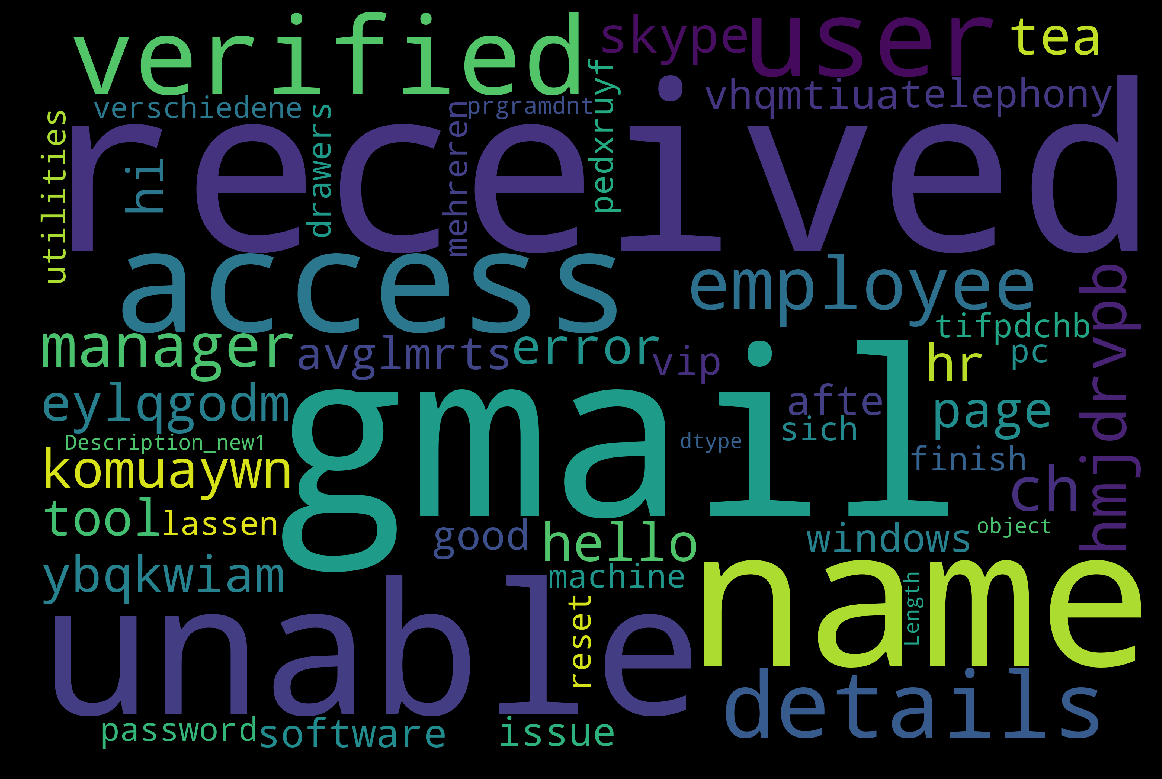

In [ ]:
print('\033[1mMost frequent words in Description dataset after removal of stopwords\033[0m')
ShowWordCloud(df['Description_new1'])

In [ ]:
def searchRE(regex, value , s):
    s = re.sub(regex,value,s)
    return s

In [ ]:
call_frwd = 'please call support at the phone number in this communication for any questions you may have.'
disclaimer = "confidentiality caution: this communication (including any accompanying documents) is intended only for the sole use of the person(s) to whom it is addressed and may contain information that is privileged,confidential and exempt from disclosure. any unauthorised reading,dissemination ,distribution,duplication of this communication by someone other than the intended recipient is strictly prohibited. if your receipt of this communication is in error,please notify the sender and destrtgoy the original communication immediately."
alt_lang = "select the following link to view the disclaimer in an alternate language."

df['Description_new1'] = df['Description_new1'].apply(lambda x : searchRE(disclaimer,'',x))
df['Description_new1'] = df['Description_new1'].apply(lambda x : searchRE(alt_lang,'',x))
df['Description_new1'] = df['Description_new1'].apply(lambda x: searchRE(call_frwd, '', x))

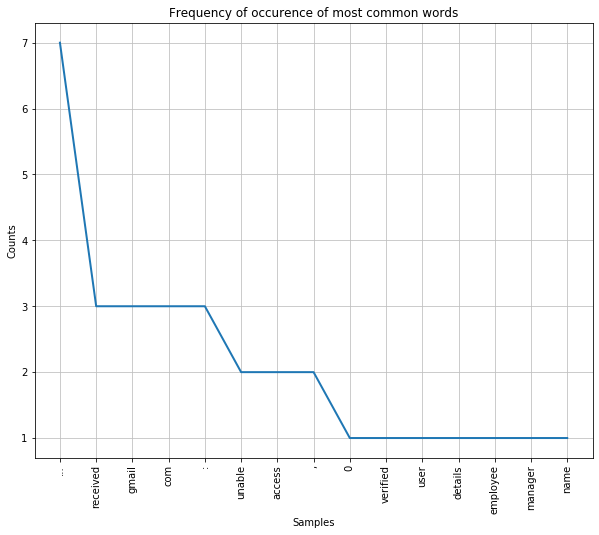

In [ ]:
plt.figure(figsize = (10, 8))
dn = df['Description_new1']
tokenizedword_dn = word_tokenize(str(dn))
plt.title('Frequency of occurence of most common words')

dnfreq = FreqDist(tokenizedword_dn)
topword = dnfreq.most_common(10)
dnfreq.plot(15, cumulative = False)
plt.show()

Most frequent words in Tokenized Description Column


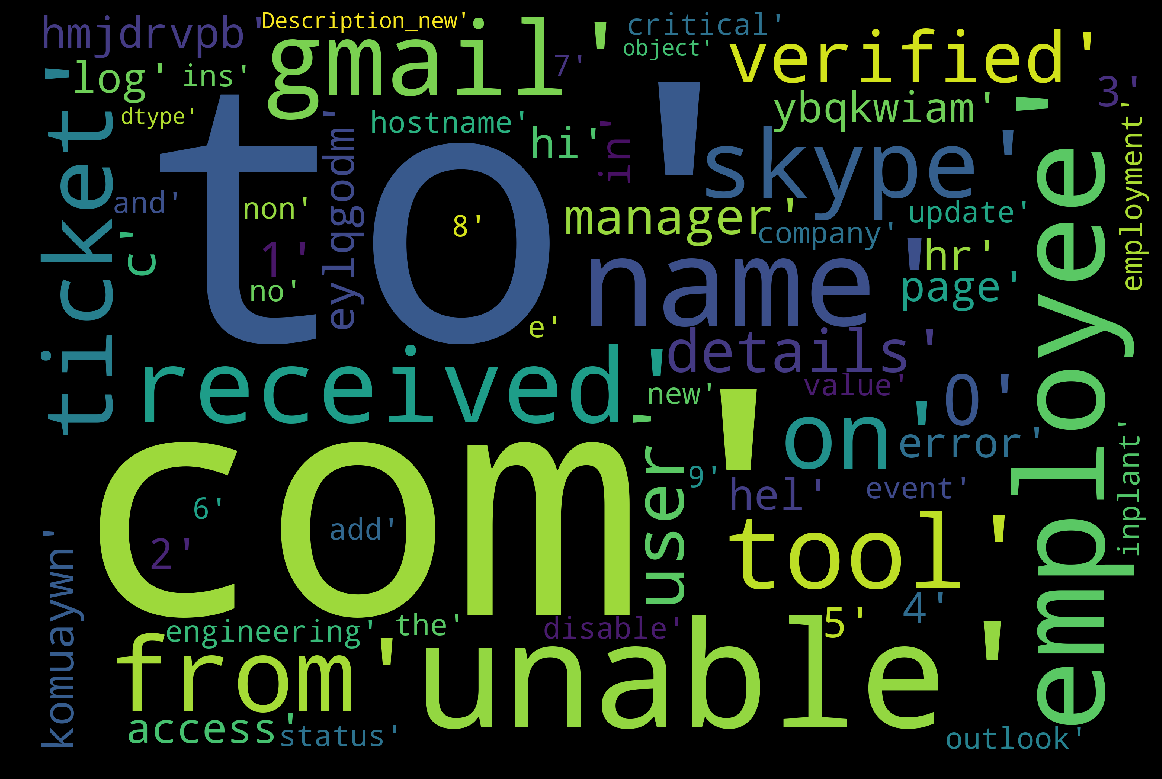

In [ ]:
print('\033[1mMost frequent words in Tokenized Description Column\033[0m')
ShowWordCloud(tokenizedword_dn)

### Feature Engineering

In [ ]:
df[['Short description_new1', 'Description_new1', 'Caller']].head()

,Short description_new1,Description_new1,Caller
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds
1,outlook,received hmjdrvpb komuaywn gmail com hello tea...,hmjdrvpb komuaywn
2,cant log vpn,received eylqgodm ybqkwiam gmail com hi cannot...,eylqgodm ybqkwiam
3,unable access hr tool page,unable access hr tool page,xbkucsvz gcpydteq
4,skype error,skype error,owlgqjme qhcozdfx


We have a few short descriptions common with description columns so merging them as a set makes sense.

In [ ]:
df['sd-dd'] = df['Short description_new1'].str.cat(df['Description_new1'], sep = ' - ')
df['sd-dd-caller'] = df['sd-dd'].str.cat(df['Caller'], sep = ' - ')

Dropping all the reduntant columns.

In [ ]:
df = df.drop(['Short description', 'Description', 'Caller', 'Description_new', 'Short description_new', 'Description_new1', 'Short description_new1', 'sd-dd'], axis = 1)
df.head()

,Assignment group,sd-dd-caller
0,GRP_0,login issue - verified user details employee m...
1,GRP_0,outlook - received hmjdrvpb komuaywn gmail com...
2,GRP_0,cant log vpn - received eylqgodm ybqkwiam gmai...
3,GRP_0,unable access hr tool page - unable access hr ...
4,GRP_0,skype error - skype error - owlgqjme qhcozdfx


In [ ]:
df = df.dropna(subset = ['Assignment group'])

Transforming the Assignment Group column into a categorical column

In [ ]:
df['Assignment group'] = df['Assignment group'].str.replace('[^\d\.]', '').astype('category').cat.codes
df.head()

,Assignment group,sd-dd-caller
0,0,login issue - verified user details employee m...
1,0,outlook - received hmjdrvpb komuaywn gmail com...
2,0,cant log vpn - received eylqgodm ybqkwiam gmai...
3,0,unable access hr tool page - unable access hr ...
4,0,skype error - skype error - owlgqjme qhcozdfx


In [ ]:
df.iloc[8455:8475, :]

,Assignment group,sd-dd-caller
8455,11,need teamviewer full version visio application...
8456,5,calculation claim amount make mistake - uxndyf...
8457,24,无法登陆hr tool考勤系统 - 显示java插件无法加载 所需版本 或更高版本。 - k...
8458,0,windows account locked - windows account locke...
8459,7,erp crm complaint assigned generating duplicat...
8460,73,abended job job scheduler job - received monit...
8461,72,reboot lhqsm patent web uacyltoe hxgaycze serv...
8462,73,abended job job scheduler job - received monit...
8463,12,kindly refer mail renew account visfgthal vvjo...
8464,0,sid log issue - received rjanhbde owfkyjcp gma...


### Modelling

In [ ]:
def timeDiff(time1,time2):
    elapsed = time2 - time1
    return elapsed 

In [ ]:
df_model = pd.DataFrame(columns=['ModelName', 'Training Accuracy', 'Testing Accuracy', 'Time Taken(secs)'])
def classifier(modelname, estimator, X_train, X_test, y_train, y_test):
    global df_model
        
    time1 = time.time()
   
    clf = estimator
    clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', estimator)]) 
    clf.fit(X_train, y_train) 
    time2 = time.time()
    
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    
    
    print('\033[1m\nTraining accuracy:\033[0m %.2f%%\n' % (accuracy_score(y_train, y_train_pred) * 100))
    print('\033[1m\nTesting accuracy:\033[0m %.2f%%\n' % (accuracy_score(y_test, y_pred) * 100))
    
    print('\033[1m\nConfusion matrix:\033[0m\n %s' % (confusion_matrix(y_test, y_pred)))
    
    
    print('\033[1m\nClassification report:\033[0m\n')
    plt.figure(figsize = (10, 15))
    clf_report = classification_report(y_test, y_pred,output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).T, annot = True,cmap = "Blues",annot_kws = {"size": 16})
    
    df_model = df_model.append({'ModelName': modelname,'Training Accuracy' : (accuracy_score(y_train, y_train_pred) * 100), 'Testing Accuracy': (accuracy_score(y_test, y_pred) * 100), 'Time Taken(secs)' : timeDiff(time1,time2)},ignore_index=True)

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df['sd-dd-caller'], df['Assignment group'], test_size = 0.2, 
                                                    random_state = 25)
print('The \033[1mtraining set\033[0m contains \033[1m{}\033[0m rows.'.format(X_train.shape))
print('The \033[1mtest set\033[0m contains \033[1m{}\033[0m rows.'.format(X_test.shape))

The training set contains (6800,) rows.
The test set contains (1700,) rows.


### Multinomial Naive Bayes


Training accuracy: 56.47%


Testing accuracy: 57.00%


Confusion matrix:
 [[797   0   0 ...   0   0   0]
 [  4   0   0 ...   0   2   0]
 [ 13   0   0 ...   0   7   0]
 ...
 [ 10   0   0 ...   0   0   0]
 [  7   0   0 ...   0 140   0]
 [ 15   0   0 ...   0  29   0]]

Classification report:



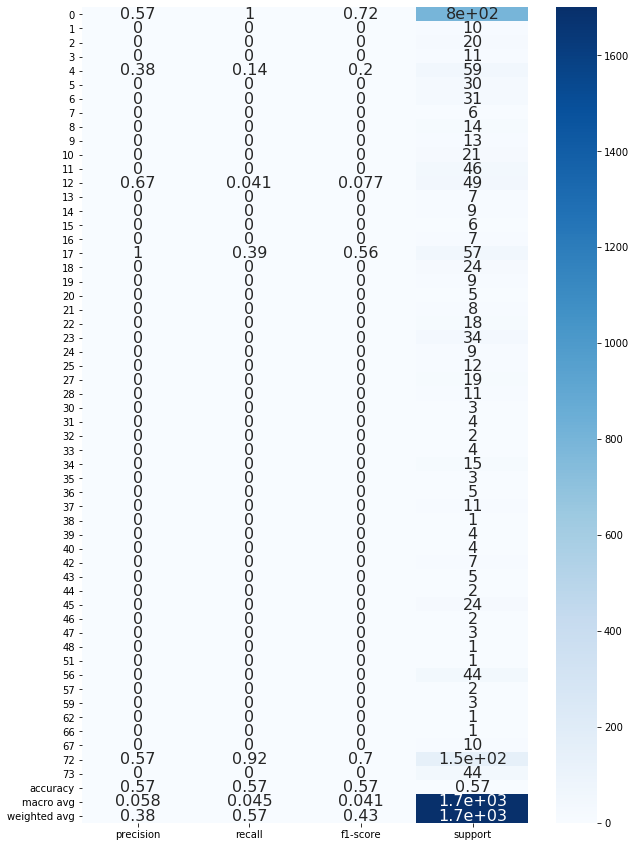

In [ ]:
classifier("Multinomial Naive Bayes", MultinomialNB(), X_train, X_test, y_train, y_test)

### Support Vector Classifier - Linear


Training accuracy: 93.81%


Testing accuracy: 71.06%


Confusion matrix:
 [[743   0   0 ...   1   0   1]
 [  2   3   0 ...   0   3   0]
 [  7   0  10 ...   0   1   1]
 ...
 [  0   0   0 ...   0   0   0]
 [  1   1   1 ...   0 134   0]
 [  6   0   0 ...   0  27   8]]

Classification report:



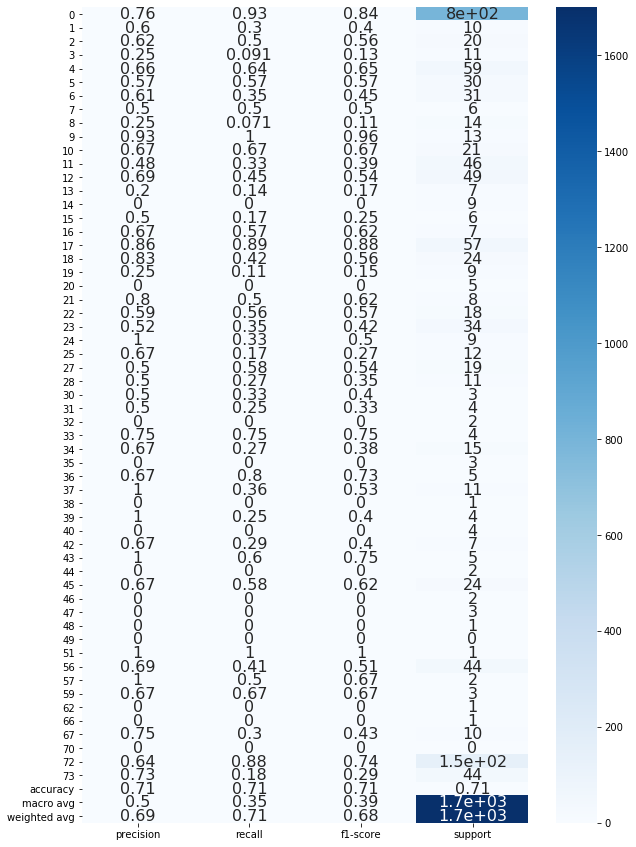

In [ ]:
classifier("SVC-Linear",LinearSVC(), X_train, X_test, y_train, y_test)

### Support Vector Classifier - Radial Basis Function (rbf) kernel


Training accuracy: 82.07%


Testing accuracy: 65.12%


Confusion matrix:
 [[791   0   0 ...   0   0   0]
 [  3   2   0 ...   0   2   0]
 [ 13   0   5 ...   0   2   0]
 ...
 [  8   0   0 ...   2   0   0]
 [  4   0   1 ...   0 134   4]
 [ 15   0   0 ...   0  25   4]]

Classification report:



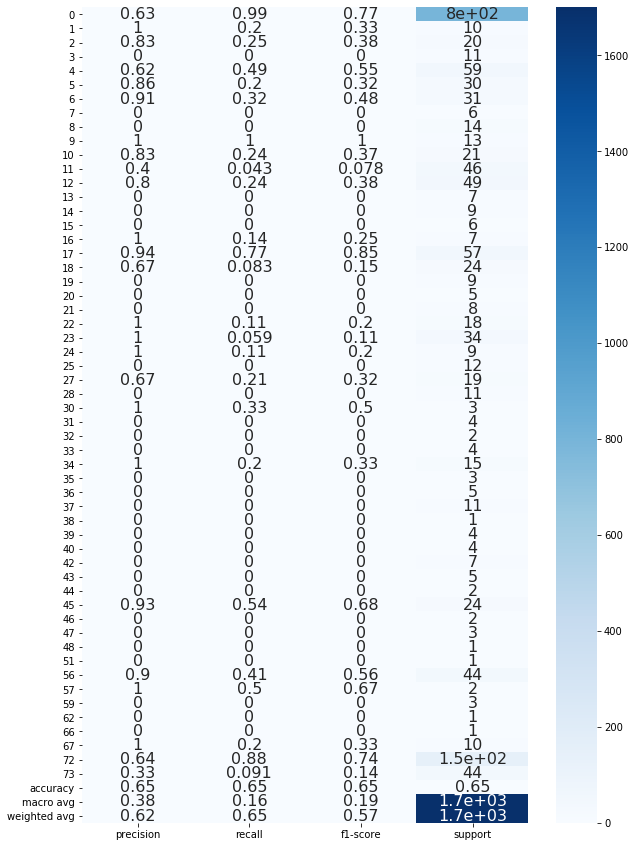

In [ ]:
classifier("SVC-RBF", SVC(kernel = 'rbf'), X_train, X_test, y_train, y_test)

### Decision Tree


Training accuracy: 95.46%


Testing accuracy: 61.12%


Confusion matrix:
 [[666   0   2 ...   1   1   2]
 [  1   1   0 ...   0   1   0]
 [  8   0   5 ...   0   1   1]
 ...
 [  0   0   0 ...   0   0   0]
 [  1   1   1 ...   0 127   4]
 [  4   0   0 ...   0  25   7]]

Classification report:



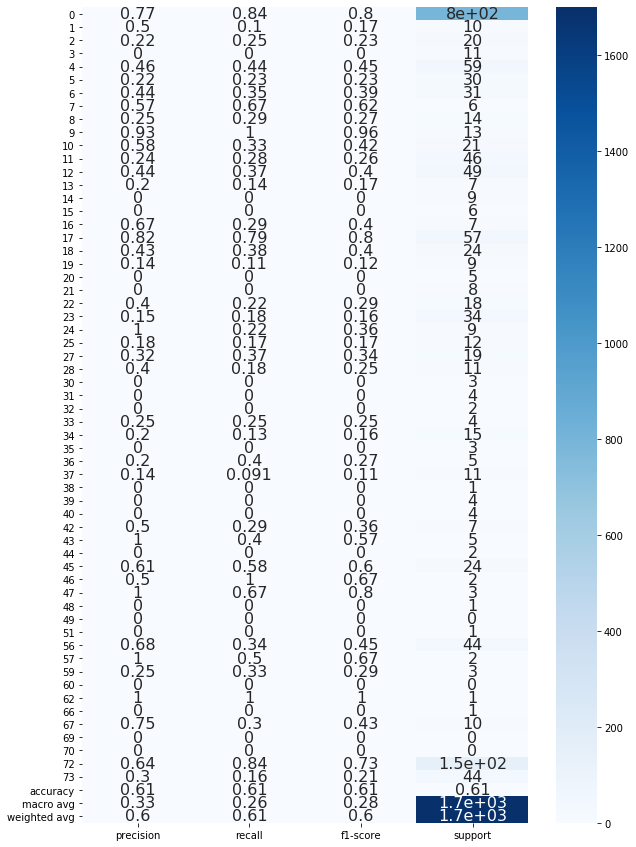

In [ ]:
classifier("Decision Tree", DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

### Random Forest


Training accuracy: 95.44%


Testing accuracy: 66.00%


Confusion matrix:
 [[781   0   0 ...   1   0   0]
 [  3   2   0 ...   0   2   0]
 [ 14   0   5 ...   0   1   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  5   0   1 ...   0 133   4]
 [ 13   0   0 ...   0  26   4]]

Classification report:



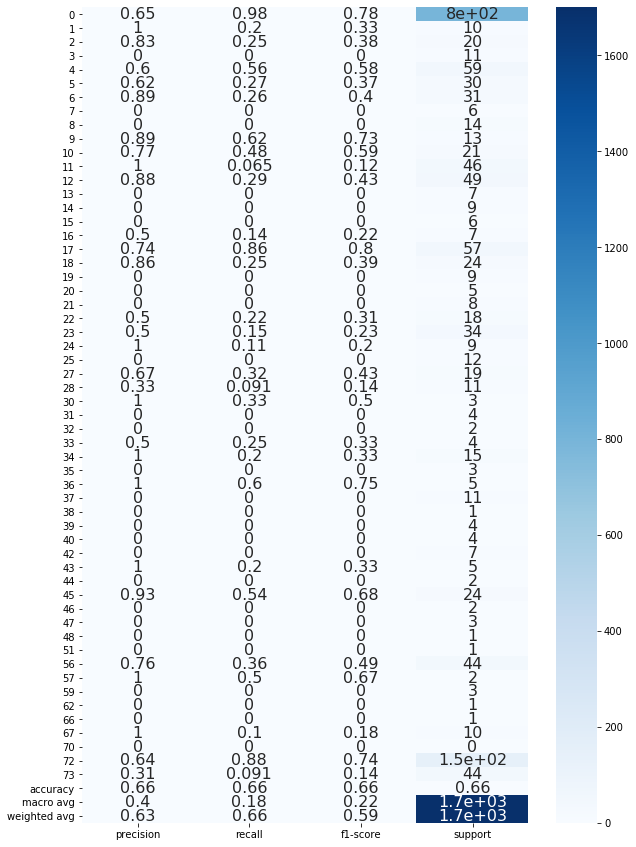

In [ ]:
classifier("Random Forest", RandomForestClassifier(), X_train, X_test, y_train, y_test)

In [ ]:
df_model.head()

,ModelName,Training Accuracy,Testing Accuracy,Time Taken(secs)
0,Multinomial Naive Bayes,56.470588,57.000000,0.547417
1,SVC-Linear,93.808824,71.058824,1.313381
2,SVC-RBF,82.073529,65.117647,45.174858
3,Decision Tree,95.455882,61.117647,4.025210
4,Random Forest,95.441176,66.000000,18.681338


### Pre - processing for Deep Learning Models

In [ ]:
train_size = int(len(df) * 0.8)
print('\033[1mTrain Size:\033[0m', train_size)
print('\033[1mTest Size:\033[0m %d' % (len(df) - train_size))

X_train = df['sd-dd-caller'][:train_size]
y_train = df['Assignment group'][:train_size]

X_test = df['sd-dd-caller'][train_size:]
y_test = df['Assignment group'][train_size:]

Train Size: 6800
Test Size: 1700


In [ ]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

y_train = tensorflow.keras.utils.to_categorical(np.asarray(y_train))
print('The y_train tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(y_train.shape[0], y_train.shape[1]))
y_test = tensorflow.keras.utils.to_categorical(np.asarray(y_test))
print('The y_test tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(y_test.shape[0], y_test.shape[1]))

The y_train tensor contains 6800 rows and 74 columns.
The y_test tensor contains 1700 rows and 74 columns.


In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words, char_level = False)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

### Padding

In [ ]:
MAX_SEQUENCE_LENGTH = 150
X_train = pad_sequences(sequences_train, maxlen = MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen = MAX_SEQUENCE_LENGTH)
print('The data tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(X_train.shape[0], X_train.shape[1]))
print('The data test tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(X_test.shape[0], X_test.shape[1]))

The data tensor contains 6800 rows and 150 columns.
The data test tensor contains 1700 rows and 150 columns.


### Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

### Artificial Neural Network

In [ ]:
embedding_dim = 50
n_class = 74

ann = Sequential()
ann.add(Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = MAX_SEQUENCE_LENGTH))
ann.add(Flatten())
ann.add(Dropout(0.3))

ann.add(Dense(512, input_dim = 512, activation = 'relu'))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())

ann.add(Dense(512, input_dim = 512, activation = 'relu'))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())

ann.add(Dense(n_class, activation = 'softmax'))
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 50)           500000    
_________________________________________________________________
flatten (Flatten)            (None, 7500)              0         
_________________________________________________________________
dropout (Dropout)            (None, 7500)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3840512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2

In [ ]:
time1 = time.time()
history = ann.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test), verbose = 2)
time2 = time.time()

Train on 6800 samples, validate on 1700 samples
Epoch 1/20
6800/6800 - 8s - loss: 2.7168 - accuracy: 0.4644 - val_loss: 2.6263 - val_accuracy: 0.4853
Epoch 2/20
6800/6800 - 7s - loss: 1.6137 - accuracy: 0.6159 - val_loss: 2.2512 - val_accuracy: 0.4982
Epoch 3/20
6800/6800 - 7s - loss: 1.0096 - accuracy: 0.7406 - val_loss: 1.9929 - val_accuracy: 0.5471
Epoch 4/20
6800/6800 - 7s - loss: 0.6271 - accuracy: 0.8319 - val_loss: 2.1118 - val_accuracy: 0.5494
Epoch 5/20
6800/6800 - 7s - loss: 0.4367 - accuracy: 0.8763 - val_loss: 2.3906 - val_accuracy: 0.5524
Epoch 6/20
6800/6800 - 7s - loss: 0.3453 - accuracy: 0.8993 - val_loss: 2.5422 - val_accuracy: 0.5482
Epoch 7/20
6800/6800 - 7s - loss: 0.2831 - accuracy: 0.9157 - val_loss: 2.4354 - val_accuracy: 0.5688
Epoch 8/20
6800/6800 - 7s - loss: 0.2534 - accuracy: 0.9210 - val_loss: 2.4526 - val_accuracy: 0.5488
Epoch 9/20
6800/6800 - 7s - loss: 0.2402 - accuracy: 0.9268 - val_loss: 2.5630 - val_accuracy: 0.5512
Epoch 10/20
6800/6800 - 7s - loss:

In [ ]:
train_accuracy = ann.evaluate(X_train, y_train)
print('Training set loss \033[1m{:0.3f}\033[0m and accuracy: \033[1m{:0.3f}\033[0m %'.format(train_accuracy[0], (train_accuracy[1] * 100)))

6800/6800 [==============================] - 1s 171us/sample - loss: 0.1371 - accuracy: 0.9525
Training set loss 0.137 and accuracy: 95.250 %


In [ ]:
test_accuracy = ann.evaluate(X_test, y_test)
print('Test set loss \033[1m{:0.3f}\033[0m and accuracy: \033[1m{:0.3f}\033[0m %'.format(test_accuracy[0], (test_accuracy[1] * 100)))

1700/1700 [==============================] - 0s 169us/sample - loss: 2.7597 - accuracy: 0.5647
Test set loss 2.760 and accuracy: 56.471 %


In [ ]:
df_model = df_model.append({'ModelName': "Artificial Neural Network", 'Training Accuracy' : (train_accuracy[1] * 100), 'Testing Accuracy': (test_accuracy[1] * 100), 'Time Taken(secs)' : timeDiff(time1,time2)}, ignore_index = True)

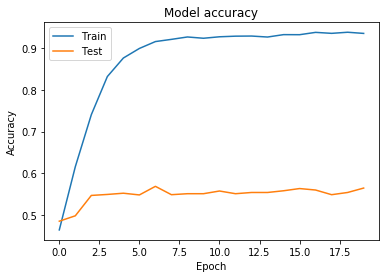

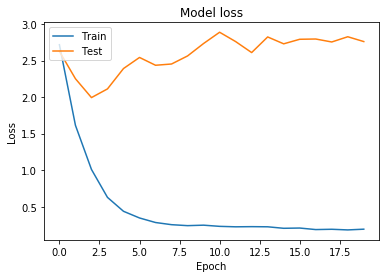

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### LSTM (Long Short Term Memory) Network

In [ ]:
embedding_dim = 50
n_class = 74

sequence_input = Input(shape = (MAX_SEQUENCE_LENGTH,), dtype = 'int32')
embedding_layer = Embedding(max_words, embedding_dim, input_length = MAX_SEQUENCE_LENGTH, trainable = True)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout = 0.5, recurrent_dropout = 0.5)(embedded_sequences)
predictions = Dense(n_class, activation = 'softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           500000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dense (Dense)                (None, 74)                9546      
Total params: 601,194
Trainable params: 601,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#time1 = time.time()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 32, verbose = 2)
#time2 = time.time()

Train on 6800 samples, validate on 1700 samples
Epoch 1/10
6800/6800 - 62s - loss: 2.5377 - acc: 0.4893 - val_loss: 2.2497 - val_acc: 0.5171
Epoch 2/10
6800/6800 - 60s - loss: 1.9915 - acc: 0.5601 - val_loss: 2.1094 - val_acc: 0.5341
Epoch 3/10
6800/6800 - 62s - loss: 1.8039 - acc: 0.5749 - val_loss: 2.1067 - val_acc: 0.5253
Epoch 4/10
6800/6800 - 61s - loss: 1.6772 - acc: 0.5906 - val_loss: 2.0579 - val_acc: 0.5324
Epoch 5/10
6800/6800 - 64s - loss: 1.5693 - acc: 0.6026 - val_loss: 2.0528 - val_acc: 0.5371
Epoch 6/10
6800/6800 - 67s - loss: 1.4679 - acc: 0.6222 - val_loss: 2.0361 - val_acc: 0.5347
Epoch 7/10
6800/6800 - 168s - loss: 1.3714 - acc: 0.6432 - val_loss: 2.0617 - val_acc: 0.5353
Epoch 8/10
6800/6800 - 69s - loss: 1.2872 - acc: 0.6601 - val_loss: 2.0426 - val_acc: 0.5512
Epoch 9/10
6800/6800 - 67s - loss: 1.1928 - acc: 0.6834 - val_loss: 2.0640 - val_acc: 0.5594
Epoch 10/10
6800/6800 - 71s - loss: 1.1092 - acc: 0.6990 - val_loss: 2.0600 - val_acc: 0.5559


In [ ]:
train_accuracy = model.evaluate(X_train, y_train)
print('Training set loss \033[1m{:0.3f}\033[0m and accuracy: \033[1m{:0.3f}\033[0m %'.format(train_accuracy[0], (train_accuracy[1] * 100)))

6800/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training set loss 0.919 and accuracy: 74.265 %


In [ ]:
test_accuracy = model.evaluate(X_test, y_test)
print('Test set loss \033[1m{:0.3f}\033[0m and accuracy: \033[1m{:0.3f}\033[0m %'.format(test_accuracy[0], (test_accuracy[1] * 100)))

1700/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test set loss 2.060 and accuracy: 55.588 %


In [ ]:
df_model = df_model.append({'ModelName': 'LSTM','Training Accuracy' : (train_accuracy[1] * 100), 'Testing Accuracy': (test_accuracy[1] * 100), 'Time Taken(secs)' : timeDiff(time1,time2)},ignore_index=True)

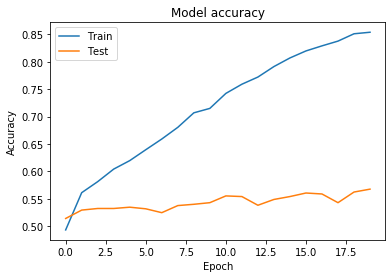

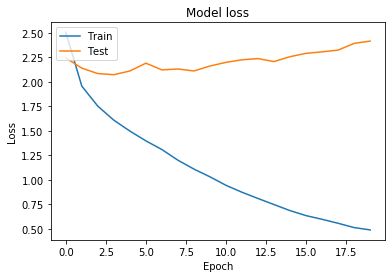

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

### Bi-directional LSTM  (Long Short Term Memory) Network

In [ ]:
embedding_dim = 50
n_class = 74
#model = Sequential()

sequence_input = Input(shape = (MAX_SEQUENCE_LENGTH,), dtype = 'int32')
embedding_layer = Embedding(max_words, embedding_dim, input_length = MAX_SEQUENCE_LENGTH, trainable = True)
embedded_sequences = embedding_layer(sequence_input)

x = Bidirectional(LSTM(128, dropout = 0.5, recurrent_dropout = 0.5))(embedded_sequences)
predictions = Dense(n_class, activation = 'softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               183296    
_________________________________________________________________
dense_4 (Dense)              (None, 74)                19018     
Total params: 702,314
Trainable params: 702,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
time1 = time.time()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 32, verbose = 2)
time2 = time.time()

Train on 6800 samples, validate on 1700 samples
Epoch 1/20
6800/6800 - 138s - loss: 2.4931 - acc: 0.4957 - val_loss: 2.1977 - val_acc: 0.5176
Epoch 2/20
6800/6800 - 140s - loss: 1.9084 - acc: 0.5663 - val_loss: 2.0735 - val_acc: 0.5259
Epoch 3/20
6800/6800 - 139s - loss: 1.7095 - acc: 0.5909 - val_loss: 2.0367 - val_acc: 0.5465
Epoch 4/20
6800/6800 - 139s - loss: 1.5623 - acc: 0.6063 - val_loss: 2.0224 - val_acc: 0.5471
Epoch 5/20
6800/6800 - 139s - loss: 1.4566 - acc: 0.6215 - val_loss: 2.0562 - val_acc: 0.5494
Epoch 6/20
6800/6800 - 140s - loss: 1.3593 - acc: 0.6396 - val_loss: 2.0458 - val_acc: 0.5371
Epoch 7/20
6800/6800 - 139s - loss: 1.2712 - acc: 0.6579 - val_loss: 2.0543 - val_acc: 0.5465
Epoch 8/20
6800/6800 - 140s - loss: 1.1803 - acc: 0.6759 - val_loss: 2.0732 - val_acc: 0.5341
Epoch 9/20
6800/6800 - 140s - loss: 1.0971 - acc: 0.6932 - val_loss: 2.0510 - val_acc: 0.5482
Epoch 10/20
6800/6800 - 153s - loss: 1.0167 - acc: 0.7168 - val_loss: 2.0928 - val_acc: 0.5518
Epoch 11/20

In [ ]:
train_accuracy = model.evaluate(X_train, y_train)
print('Training set loss \033[1m{:0.3f}\033[0m and accuracy: \033[1m{:0.3f}\033[0m %'.format(train_accuracy[0], (train_accuracy[1] * 100)))

6800/6800 [==============================] - 9s 1ms/sample - loss: 0.3629 - acc: 0.8896
Training set loss 0.363 and accuracy: 88.956 %


In [ ]:
test_accuracy = model.evaluate(X_test, y_test)
print('Test set loss \033[1m{:0.3f}\033[0m and accuracy: \033[1m{:0.3f}\033[0m %'.format(test_accuracy[0], (test_accuracy[1] * 100)))

1700/1700 [==============================] - 3s 1ms/sample - loss: 2.4475 - acc: 0.5541
Test set loss 2.447 and accuracy: 55.412 %


In [ ]:
df_model = df_model.append({'ModelName': 'Bi-Directional LSTM','Training Accuracy' : (train_accuracy[1] * 100), 'Testing Accuracy': (test_accuracy[1] * 100), 'Time Taken(secs)' : timeDiff(time1,time2)},ignore_index=True)

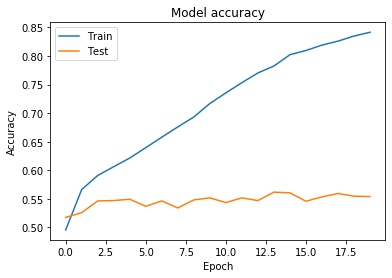

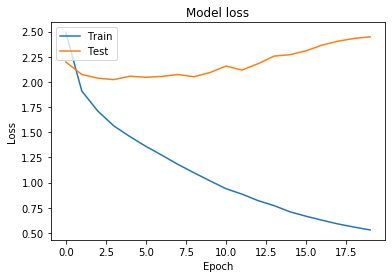

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
df_model.head(8)

,ModelName,Training Accuracy,Testing Accuracy,Time Taken(secs)
0,Multinomial Naive Bayes,56.470588,57.000000,0.236811
1,SVC-Linear,93.808824,71.058824,0.753612
2,SVC-RBF,82.088235,65.117647,27.963569
3,Decision Tree,95.455882,62.176471,2.161059
4,Random Forest,95.426471,66.882353,9.522264
5,Artificial Neural Network,95.249999,56.470591,144.748640
6,LSTM,89.602941,56.764704,738.131450
7,Bi-Directional LSTM,88.955885,55.411762,2940.460537


## Summary
Out of all the model architectures we tried, the accuracy of each of the model given below in the table. Statistical models have overfitted to a higher degree. One obvious reason could be due to a highly imbalanced dataset. Neural Networks need to be fine tuned to increase the accuracy and decrease the overfit.  
  
Following are some of the options to try in Milestone-2 as part of fine tuning.
- Dealing with imbalanced dataset. 
    - Creating distinctive clusters under GRP_0 and downsampling top clusters
    - Clubbing together all those groups into one which has 30 or less tickets assigned
- Replacing TF-IDF vectorizer technique with word embeddings for statistical ML algorithms.
- Running GridSearchCV to perform hyper-parameter tuning.
- Altering intermediate layers in case of Neural Networks and adding dropout or a batch normalization layer.
- Using Transfer learning

## Model Optimization with Hypertuning

In [ ]:
# Tuning external hyperparameter variables before going into model variables.

In [ ]:
group_df['% representation'] = round(((group_df['frequency'] / group_df['frequency'].sum()) * 100), 2)
group_df.head(15)

,frequency,% representation
GRP_0,3976,46.78
GRP_8,661,7.78
GRP_24,289,3.40
GRP_12,257,3.02
GRP_9,252,2.96
GRP_2,241,2.84
GRP_19,215,2.53
GRP_3,200,2.35
GRP_6,184,2.16
GRP_13,145,1.71


Taking Top 15 groups into account to build LSTM model.

In [ ]:
n = 15
top15 = df['Assignment group'].value_counts()[:n].index.tolist()

In [ ]:
df1 = df[df["Assignment group"].isin(top15)]

In [ ]:
df1["Assignment group"].value_counts()

0     3976
72     661
17     289
4      257
73     252
12     241
11     215
23     200
56     184
5      145
2      140
45     129
6      118
18     116
27     107
Name: Assignment group, dtype: int64

In [ ]:
#Taking 60:40 train:test ratio.

train_size = int(len(df1) * 0.6)
print('\033[1mTrain Size:\033[0m', train_size)
print('\033[1mTest Size:\033[0m %d' % (len(df1) - train_size))

X_train = df1['sd-dd-caller'][:train_size]
y_train = df1['Assignment group'][:train_size]

X_test = df1['sd-dd-caller'][train_size:]
y_test = df1['Assignment group'][train_size:]

Train Size: 4218
Test Size: 2812


In [ ]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

y_train = tensorflow.keras.utils.to_categorical(np.asarray(y_train))
print('The y_train tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(y_train.shape[0], y_train.shape[1]))
y_test = tensorflow.keras.utils.to_categorical(np.asarray(y_test))
print('The y_test tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(y_test.shape[0], y_test.shape[1]))

The y_train tensor contains 4218 rows and 74 columns.
The y_test tensor contains 2812 rows and 74 columns.


In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words, char_level = False)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

### Padding

In [ ]:
MAX_SEQUENCE_LENGTH = 250
X_train = pad_sequences(sequences_train, maxlen = MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen = MAX_SEQUENCE_LENGTH)
print('The data tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(X_train.shape[0], X_train.shape[1]))
print('The data test tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(X_test.shape[0], X_test.shape[1]))

The data tensor contains 4218 rows and 250 columns.
The data test tensor contains 2812 rows and 250 columns.


### LSTM Model 1

In [ ]:
embedding_dim = 200
n_class = 74

sequence_input = Input(shape = (MAX_SEQUENCE_LENGTH,), dtype = 'int32')
embedding_layer = Embedding(max_words, embedding_dim, input_length = MAX_SEQUENCE_LENGTH, trainable = True)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(embedded_sequences)
predictions = Dense(n_class, activation = 'softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 250, 200)          2000000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_2 (Dense)              (None, 74)                9546      
Total params: 2,177,994
Trainable params: 2,177,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
time1 = time.time()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 256, verbose = 2)
time2 = time.time()

Train on 4218 samples, validate on 2812 samples
Epoch 1/20
4218/4218 - 48s - loss: 3.2506 - acc: 0.5263 - val_loss: 2.0734 - val_acc: 0.5669
Epoch 2/20
4218/4218 - 35s - loss: 1.9020 - acc: 0.5647 - val_loss: 1.7873 - val_acc: 0.5669
Epoch 3/20
4218/4218 - 35s - loss: 1.7034 - acc: 0.5647 - val_loss: 1.6694 - val_acc: 0.5669
Epoch 4/20
4218/4218 - 36s - loss: 1.5256 - acc: 0.6114 - val_loss: 1.4553 - val_acc: 0.6355
Epoch 5/20
4218/4218 - 35s - loss: 1.3106 - acc: 0.6579 - val_loss: 1.3011 - val_acc: 0.6533
Epoch 6/20
4218/4218 - 35s - loss: 1.1428 - acc: 0.6795 - val_loss: 1.2369 - val_acc: 0.6767
Epoch 7/20
4218/4218 - 35s - loss: 1.0095 - acc: 0.7055 - val_loss: 1.2167 - val_acc: 0.6867
Epoch 8/20
4218/4218 - 35s - loss: 0.9157 - acc: 0.7195 - val_loss: 1.1840 - val_acc: 0.6757
Epoch 9/20
4218/4218 - 35s - loss: 0.8384 - acc: 0.7392 - val_loss: 1.2075 - val_acc: 0.6792
Epoch 10/20
4218/4218 - 35s - loss: 0.7476 - acc: 0.7698 - val_loss: 1.1867 - val_acc: 0.6785
Epoch 11/20
4218/4218

### 2nd Top 15 Groups Model

In [ ]:
group_df['% representation'] = round(((group_df['frequency'] / group_df['frequency'].sum()) * 100), 2)
group_df.head(30)

,frequency,% representation
GRP_0,3976,46.78
GRP_8,661,7.78
GRP_24,289,3.40
GRP_12,257,3.02
GRP_9,252,2.96
GRP_2,241,2.84
GRP_19,215,2.53
GRP_3,200,2.35
GRP_6,184,2.16
GRP_13,145,1.71


In [ ]:
top15second = df['Assignment group'].value_counts()[15:30].index.tolist()

In [ ]:
df2 = df[df["Assignment group"].isin(top15second)]

In [ ]:
df2["Assignment group"].value_counts()

34    100
22     97
10     88
8      85
9      81
25     69
67     68
28     62
19     56
35     45
21     44
36     40
24     39
7      39
37     37
Name: Assignment group, dtype: int64

In [ ]:
#Taking 60:40 train:test ratio.

train_size = int(len(df2) * 0.6)
print('\033[1mTrain Size:\033[0m', train_size)
print('\033[1mTest Size:\033[0m %d' % (len(df2) - train_size))

X_train = df2['sd-dd-caller'][:train_size]
y_train = df2['Assignment group'][:train_size]

X_test = df2['sd-dd-caller'][train_size:]
y_test = df2['Assignment group'][train_size:]

Train Size: 570
Test Size: 380


In [ ]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

y_train = tensorflow.keras.utils.to_categorical(np.asarray(y_train))
print('The y_train tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(y_train.shape[0], y_train.shape[1]))
y_test = tensorflow.keras.utils.to_categorical(np.asarray(y_test))
print('The y_test tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(y_test.shape[0], y_test.shape[1]))

The y_train tensor contains 570 rows and 68 columns.
The y_test tensor contains 380 rows and 68 columns.


In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words, char_level = False)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

Padding

In [ ]:
MAX_SEQUENCE_LENGTH = 250
X_train = pad_sequences(sequences_train, maxlen = MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen = MAX_SEQUENCE_LENGTH)
print('The data tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(X_train.shape[0], X_train.shape[1]))
print('The data test tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(X_test.shape[0], X_test.shape[1]))

The data tensor contains 570 rows and 250 columns.
The data test tensor contains 380 rows and 250 columns.


LSTM Model

In [ ]:
embedding_dim = 200
n_class = 68

sequence_input = Input(shape = (MAX_SEQUENCE_LENGTH,), dtype = 'int32')
embedding_layer = Embedding(max_words, embedding_dim, input_length = MAX_SEQUENCE_LENGTH, trainable = True)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(embedded_sequences)
predictions = Dense(n_class, activation = 'softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 200)          2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_1 (Dense)              (None, 68)                8772      
Total params: 2,177,220
Trainable params: 2,177,220
Non-trainable params: 0
_________________________________________________________________


In [ ]:
time1 = time.time()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 256, verbose = 2)
time2 = time.time()

Train on 570 samples, validate on 380 samples
Epoch 1/10
570/570 - 30s - loss: 4.2139 - acc: 0.0596 - val_loss: 4.1838 - val_acc: 0.2474
Epoch 2/10
570/570 - 6s - loss: 4.1722 - acc: 0.4088 - val_loss: 4.1172 - val_acc: 0.2816
Epoch 3/10
570/570 - 6s - loss: 4.0857 - acc: 0.4649 - val_loss: 3.8376 - val_acc: 0.1237
Epoch 4/10
570/570 - 6s - loss: 3.7312 - acc: 0.1877 - val_loss: 3.2604 - val_acc: 0.0974
Epoch 5/10
570/570 - 6s - loss: 3.2234 - acc: 0.1105 - val_loss: 2.9682 - val_acc: 0.0500
Epoch 6/10
570/570 - 6s - loss: 2.9543 - acc: 0.0895 - val_loss: 2.8165 - val_acc: 0.1211
Epoch 7/10
570/570 - 6s - loss: 2.8099 - acc: 0.1316 - val_loss: 2.7467 - val_acc: 0.0711
Epoch 8/10
570/570 - 6s - loss: 2.7421 - acc: 0.1211 - val_loss: 2.7030 - val_acc: 0.0947
Epoch 9/10
570/570 - 6s - loss: 2.6853 - acc: 0.1684 - val_loss: 2.6750 - val_acc: 0.1921
Epoch 10/10
570/570 - 6s - loss: 2.6563 - acc: 0.1579 - val_loss: 2.6531 - val_acc: 0.2026


## Model on Rest of the Groups, Ignoring Groups having frequency lower than 4

In [ ]:
group_df['% representation'] = round(((group_df['frequency'] / group_df['frequency'].sum()) * 100), 2)
group_df.tail(20)

,frequency,% representation
GRP_46,6,0.07
GRP_43,5,0.06
GRP_32,4,0.05
GRP_66,4,0.05
GRP_68,3,0.04
GRP_38,3,0.04
GRP_63,3,0.04
GRP_58,3,0.04
GRP_56,3,0.04
GRP_57,2,0.02


In [ ]:
othergroups = df['Assignment group'].value_counts()[30:58].index.tolist()

In [ ]:
df3 = df[df["Assignment group"].isin(othergroups)]

In [ ]:
df3["Assignment group"].value_counts()

13    36
40    35
15    31
1     31
3     30
14    29
42    27
16    25
43    25
59    25
57    20
33    19
20    18
31    16
30    15
39    15
46    14
62    11
49    11
48     9
51     8
47     8
41     6
44     6
55     6
38     5
26     4
63     4
Name: Assignment group, dtype: int64

In [ ]:
#Taking 60:40 train:test ratio.

train_size = int(len(df3) * 0.7)
print('\033[1mTrain Size:\033[0m', train_size)
print('\033[1mTest Size:\033[0m %d' % (len(df3) - train_size))

X_train = df3['sd-dd-caller'][:train_size]
y_train = df3['Assignment group'][:train_size]

X_test = df3['sd-dd-caller'][train_size:]
y_test = df3['Assignment group'][train_size:]

Train Size: 342
Test Size: 147


In [ ]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

y_train = tensorflow.keras.utils.to_categorical(np.asarray(y_train))
print('The y_train tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(y_train.shape[0], y_train.shape[1]))
y_test = tensorflow.keras.utils.to_categorical(np.asarray(y_test))
print('The y_test tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(y_test.shape[0], y_test.shape[1]))

The y_train tensor contains 342 rows and 64 columns.
The y_test tensor contains 147 rows and 64 columns.


In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words, char_level = False)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

Padding

In [ ]:
MAX_SEQUENCE_LENGTH = 250
X_train = pad_sequences(sequences_train, maxlen = MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen = MAX_SEQUENCE_LENGTH)
print('The data tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(X_train.shape[0], X_train.shape[1]))
print('The data test tensor contains \033[1m{}\033[0m rows and \033[1m{}\033[0m columns.'.format(X_test.shape[0], X_test.shape[1]))

The data tensor contains 342 rows and 250 columns.
The data test tensor contains 147 rows and 250 columns.


LSTM Model

In [ ]:
embedding_dim = 200
n_class = 64

sequence_input = Input(shape = (MAX_SEQUENCE_LENGTH,), dtype = 'int32')
embedding_layer = Embedding(max_words, embedding_dim, input_length = MAX_SEQUENCE_LENGTH, trainable = True)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(embedded_sequences)
predictions = Dense(n_class, activation = 'softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 250)               0         
_________________________________________________________________
embedding (Embedding)        (None, 250, 200)          2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               168448    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
Total params: 2,176,704
Trainable params: 2,176,704
Non-trainable params: 0
_________________________________________________________________


In [ ]:
time1 = time.time()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 128, verbose = 2)
time2 = time.time()

Train on 342 samples, validate on 147 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 8s - loss: 4.1550 - acc: 0.0380 - val_loss: 4.1461 - val_acc: 0.0952
Epoch 2/10
 - 6s - loss: 4.1242 - acc: 0.3187 - val_loss: 4.1261 - val_acc: 0.1088
Epoch 3/10
 - 6s - loss: 4.0842 - acc: 0.3889 - val_loss: 4.0845 - val_acc: 0.1224
Epoch 4/10
 - 6s - loss: 3.9962 - acc: 0.2602 - val_loss: 3.9237 - val_acc: 0.0748
Epoch 5/10
 - 7s - loss: 3.7256 - acc: 0.1111 - val_loss: 3.7874 - val_acc: 0.1020
Epoch 6/10
 - 7s - loss: 3.5356 - acc: 0.0936 - val_loss: 3.6719 - val_acc: 0.0680
Epoch 7/10
 - 6s - loss: 3.3779 - acc: 0.0789 - val_loss: 3.5377 - val_acc: 0.0340
Epoch 8/10
 - 6s - loss: 3.2588 - acc: 0.0906 - val_loss: 3.4337 - val_acc: 0.0340
Epoch 9/10
 - 7s - loss: 3.1677 - acc: 0.1287 - val_loss: 3.3662 - val_acc: 0.0884
Epoch 10/10
 - 7s - loss: 3.0933 - acc: 0.1784 - val_loss: 3.3342 - val_acc: 0.0680


## Comparison of Models on Different Groups

LSTM (Top 15 Groups) - Training Accuracy of 91%
LSTM (Top 15 Groups) - Testing Accuracy of 71%

This shows the effect of imbalanced data on the model performance. Building a model on the top 15 groups reduces this imbalanced by some factor and thus our LSTM model performs much better than before.